# CREDIT EVALUATION PREDICTION

# Workflow

##### 1)	Data collection 

##### 2)    Data Pre-processing

##### 3)	Train – Test data

##### 4)	Model Training

##### 5)	Model Evaluation

##### 6)	Making Prediction

In [6]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data collection and pre-processing

In [7]:
# load dataset to pandas dataframe

df = pd.read_csv('C:/Users/Kamau/Credit-Evaluation-Prediction-main/loan-train.csv')

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.shape

(614, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Handling missing values

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in the data set.We are going to fill the categorical missing values with mode and numerical missing values with mean.

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [14]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

In [15]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [16]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [17]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [18]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)

In [19]:
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace = True)

In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Handling duplicate values

In [21]:
# checking the duplicate values

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [22]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool>

# Exploring dataset using plots

<AxesSubplot:>

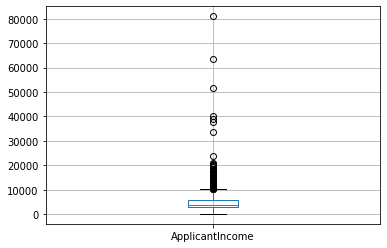

In [23]:
df.boxplot(column = 'ApplicantIncome')

<AxesSubplot:>

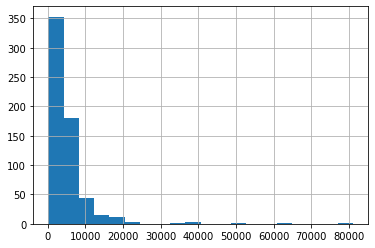

In [24]:
df['ApplicantIncome'].hist(bins = 20)

<AxesSubplot:>

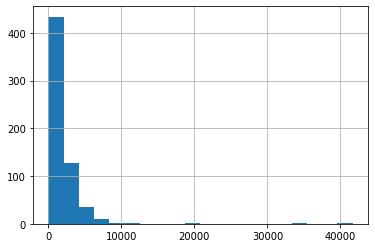

In [25]:
df['CoapplicantIncome'].hist(bins = 20)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

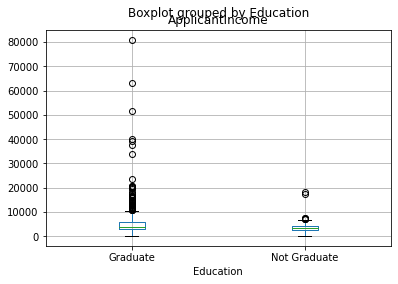

In [26]:
df.boxplot(column = 'ApplicantIncome', by = 'Education')

<AxesSubplot:>

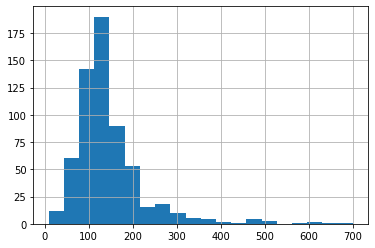

In [27]:
df['LoanAmount'].hist(bins = 20)

The loan amount data, applicant income and coapplicant income is right-skewed. So we need to normalize it. Normalizing the data using Log function.

# Normalization

In [28]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

<AxesSubplot:>

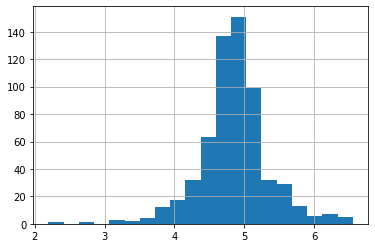

In [29]:
df['LoanAmount_log'].hist(bins = 20)

In [30]:
# making an new colum for total income

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [31]:
df['TotalIncome'] = np.log(df['TotalIncome'])

<AxesSubplot:>

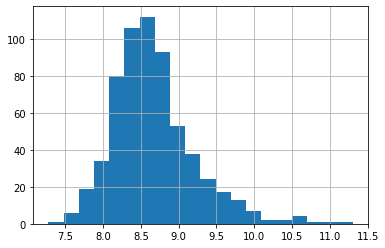

In [32]:
df['TotalIncome'].hist(bins = 20)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     614 non-null    float64
 14  TotalIncome        614 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 72.1+ KB


Here we can see that columns 1 to 5,9 to 11 and 13 to 15 are the independent variables and column 15 is the depedent variable. 

In [34]:
# divide the dataset into dependent and idependent variables

x = df.iloc[:,np.r_[1:5,9:11,13:15]]
y = df.iloc[:,12]

In [35]:
x.head()

,Gender,Married,Dependents,Education,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome
0,Male,No,0,Graduate,360.0,1.0,4.986426,8.674026
1,Male,Yes,1,Graduate,360.0,1.0,4.852030,8.714568
2,Male,Yes,0,Graduate,360.0,1.0,4.189655,8.006368
3,Male,Yes,0,Not Graduate,360.0,1.0,4.787492,8.505323
4,Male,No,0,Graduate,360.0,1.0,4.948760,8.699515


In [36]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

# Train - Test split 

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Random state = 0 will choose same data for training while every running.

In [38]:
print("Size of x:",x.shape)
print("x_train size:",x_train.shape)
print("x_test size:",x_test.shape)
print("Size of y:",y.shape)
print("y_train size:",y_train.shape)
print("y_test size:",y_test.shape)

Size of x: (614, 8)
x_train size: (491, 8)
x_test size: (123, 8)
Size of y: (614,)
y_train size: (491,)
y_test size: (123,)


In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 90 to 559
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            491 non-null    object 
 1   Married           491 non-null    object 
 2   Dependents        491 non-null    object 
 3   Education         491 non-null    object 
 4   Loan_Amount_Term  491 non-null    float64
 5   Credit_History    491 non-null    float64
 6   LoanAmount_log    491 non-null    float64
 7   TotalIncome       491 non-null    float64
dtypes: float64(4), object(4)
memory usage: 34.5+ KB


Here we need to change the categorical values into numerical values, so that the machine need to understand.

# Categorical -> numerical 

In [40]:
from sklearn.preprocessing import LabelEncoder

# making an instance of label encoder for x

labelencoder_x = LabelEncoder()

# on x_train

x_train['Gender'] = labelencoder_x.fit_transform(x_train['Gender'])
x_train['Married'] = labelencoder_x.fit_transform(x_train['Married'])
x_train['Dependents'] = labelencoder_x.fit_transform(x_train['Dependents'])
x_train['Education'] = labelencoder_x.fit_transform(x_train['Education'])

<ipython-input-40-fa05603e04b3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Gender'] = labelencoder_x.fit_transform(x_train['Gender'])
<ipython-input-40-fa05603e04b3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Married'] = labelencoder_x.fit_transform(x_train['Married'])
<ipython-input-40-fa05603e04b3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 90 to 559
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            491 non-null    int32  
 1   Married           491 non-null    int32  
 2   Dependents        491 non-null    int32  
 3   Education         491 non-null    int32  
 4   Loan_Amount_Term  491 non-null    float64
 5   Credit_History    491 non-null    float64
 6   LoanAmount_log    491 non-null    float64
 7   TotalIncome       491 non-null    float64
dtypes: float64(4), int32(4)
memory usage: 26.9 KB


In [42]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 454 to 303
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            123 non-null    object 
 1   Married           123 non-null    object 
 2   Dependents        123 non-null    object 
 3   Education         123 non-null    object 
 4   Loan_Amount_Term  123 non-null    float64
 5   Credit_History    123 non-null    float64
 6   LoanAmount_log    123 non-null    float64
 7   TotalIncome       123 non-null    float64
dtypes: float64(4), object(4)
memory usage: 8.6+ KB


In [43]:
# on x_test

x_test['Gender'] = labelencoder_x.fit_transform(x_test['Gender'])
x_test['Married'] = labelencoder_x.fit_transform(x_test['Married'])
x_test['Dependents'] = labelencoder_x.fit_transform(x_test['Dependents'])
x_test['Education'] = labelencoder_x.fit_transform(x_test['Education'])

<ipython-input-43-bff2e087fcc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Gender'] = labelencoder_x.fit_transform(x_test['Gender'])
<ipython-input-43-bff2e087fcc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Married'] = labelencoder_x.fit_transform(x_test['Married'])
<ipython-input-43-bff2e087fcc7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [44]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 454 to 303
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            123 non-null    int32  
 1   Married           123 non-null    int32  
 2   Dependents        123 non-null    int32  
 3   Education         123 non-null    int32  
 4   Loan_Amount_Term  123 non-null    float64
 5   Credit_History    123 non-null    float64
 6   LoanAmount_log    123 non-null    float64
 7   TotalIncome       123 non-null    float64
dtypes: float64(4), int32(4)
memory usage: 6.7 KB


In [45]:
# making an istance of label encoder for y

labelencoder_y = LabelEncoder()

# on y_train

y_train = labelencoder_y.fit_transform(y_train)

In [46]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [47]:
# on y_test

y_test = labelencoder_y.fit_transform(y_test)

In [48]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

# Scaling the dataset

Now we are going to SCALE the dataset. Since we have different variables in our data with different range, Scaling makes analysis and prediction much better.

In [49]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [50]:
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.fit_transform(x_test)

# Model training

# Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier()
DTClassifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
# predicting values

y_pred_dt = DTClassifier.predict(x_test)

# DTC model evaluation

In [53]:
from sklearn.metrics import accuracy_score

# testing accuracy

testing_accuracy_dt = round(accuracy_score(y_pred_dt, y_test)*100,3)
print("Accuracy score of Testing data in Decision Tree Classifier :",testing_accuracy_dt)

Accuracy score of Testing data in Decision Tree Classifier : 68.293


# Naive - Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train, y_train)

GaussianNB()

In [55]:
# predicting values

y_pred_nb = NBClassifier.predict(x_test)

# NBC model evaluation

In [56]:
testing_accuracy_nb = round(accuracy_score(y_pred_nb, y_test)*100,3)
print("Accuracy score of Testing data in Naive Bayes Classifier :",testing_accuracy_nb)

Accuracy score of Testing data in Naive Bayes Classifier : 82.927


# Predicting the values with new dataset

In [57]:
testdata = pd.read_csv('C:/Users/Kamau/Loan-Eligibility-Prediction-main/loan-test.csv')

In [58]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [59]:
testdata.shape

(367, 12)

In [60]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [61]:
# handling missing values

testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace = True)

In [62]:
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace = True)

In [63]:
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace = True)

In [64]:
testdata['LoanAmount'].fillna(testdata['LoanAmount'].mean(), inplace = True)

In [65]:
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mean(), inplace = True)

In [66]:
testdata['Credit_History'].fillna(testdata['Credit_History'].mean(), inplace = True)

In [67]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

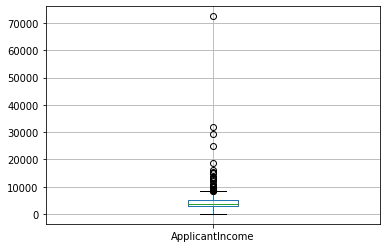

In [68]:
# finding outliers

testdata.boxplot(column = 'ApplicantIncome')

<AxesSubplot:>

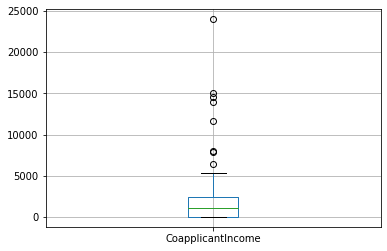

In [69]:
testdata.boxplot(column = 'CoapplicantIncome')

<AxesSubplot:>

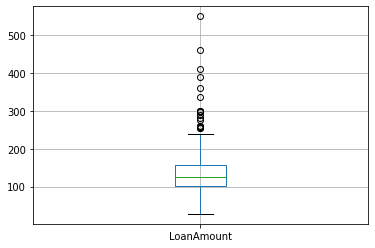

In [70]:
testdata.boxplot(column = 'LoanAmount')

In [71]:
# normalizing the values

testdata['TotalIncome'] = testdata['ApplicantIncome'] + testdata['CoapplicantIncome']
testdata['TotalIncome'] = np.log(testdata['TotalIncome'])

In [72]:
testdata['LoanAmount'] = np.log(testdata['LoanAmount'])

In [73]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,4.700480,360.0,1.000000,Urban,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,4.836282,360.0,1.000000,Urban,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,5.337538,360.0,1.000000,Urban,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,4.605170,360.0,0.825444,Urban,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,4.356709,360.0,1.000000,Urban,8.094378


In [74]:
testdata.shape

(367, 13)

In [75]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
 12  TotalIncome        367 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 37.4+ KB


In [76]:
# now we are storing the independent variable in one variable

test = testdata.iloc[:,np.r_[1:5,9:13]]

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            367 non-null    object 
 1   Married           367 non-null    object 
 2   Dependents        367 non-null    object 
 3   Education         367 non-null    object 
 4   Loan_Amount_Term  367 non-null    float64
 5   Credit_History    367 non-null    float64
 6   Property_Area     367 non-null    object 
 7   TotalIncome       367 non-null    float64
dtypes: float64(3), object(5)
memory usage: 23.1+ KB


In [78]:
# change the categorical variable into numerical variable

test['Gender'] = labelencoder_x.fit_transform(test['Gender'])
test['Married'] = labelencoder_x.fit_transform(test['Married'])
test['Dependents'] = labelencoder_x.fit_transform(test['Dependents'])
test['Education'] = labelencoder_x.fit_transform(test['Education'])
test['Property_Area'] = labelencoder_x.fit_transform(test['Property_Area'])

<ipython-input-78-e06803392391>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Gender'] = labelencoder_x.fit_transform(test['Gender'])
<ipython-input-78-e06803392391>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Married'] = labelencoder_x.fit_transform(test['Married'])
<ipython-input-78-e06803392391>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            367 non-null    int32  
 1   Married           367 non-null    int32  
 2   Dependents        367 non-null    int32  
 3   Education         367 non-null    int32  
 4   Loan_Amount_Term  367 non-null    float64
 5   Credit_History    367 non-null    float64
 6   Property_Area     367 non-null    int32  
 7   TotalIncome       367 non-null    float64
dtypes: float64(3), int32(5)
memory usage: 15.9 KB


In [80]:
# scale the test data

test = standard_scaler.fit_transform(test)

In [81]:
# predict the loan eligibility

pred = NBClassifier.predict(test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [82]:
testdata['LoanEligibility'] = pred

In [83]:
testdata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanEligibility
0,LP001015,Male,Yes,0,Graduate,No,5720,0,4.700480,360.0,1.000000,Urban,8.651724,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,4.836282,360.0,1.000000,Urban,8.428581,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,5.337538,360.0,1.000000,Urban,8.824678,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,4.605170,360.0,0.825444,Urban,8.494129,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,4.356709,360.0,1.000000,Urban,8.094378,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,4.727388,360.0,1.000000,Urban,8.663196,1
363,LP002975,Male,Yes,0,Graduate,No,4158,709,4.744932,360.0,1.000000,Urban,8.490233,1
364,LP002980,Male,No,0,Graduate,No,3250,1993,4.836282,360.0,0.825444,Semiurban,8.564649,1
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,5.062595,360.0,1.000000,Rural,8.908289,1
